# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

%matplotlib inline

In [2]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [3]:
# Forma tradicional
# df['média'] = (df.p1 + df.p2) * 0.5  # Cálculo da média entre p1 e p2
# df['diferença'] = df.p1 - df.p2  # Cálculo da diferença entre p1 e p2

# Matriz de transformação
m = np.array([[.5,.5],   # Média
              [-1, 1]])  # Diferença

# Cálculo da média e diferença entre p1 e p2 através de multiplicação matricial
df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

(df.style  # Configurar o estilo do dataframe
   .format(precision=2,  # Definir a precisão para 2 casas decimais
           decimal=',')
   .bar(subset='diferença',  # Estilização da coluna 'diferença' com barras coloridas para visualizar valores positivos e negativos
        color=['pink', 'lightblue'], 
        align='zero'))

,p1,p2,média,diferença
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"
5,"4,23","3,43","3,83","-0,80"
6,"9,81","9,84","9,82","0,03"
7,"6,85","7,92","7,38","1,07"
8,"4,81","5,70","5,25","0,89"
9,"3,92","5,68","4,80","1,75"


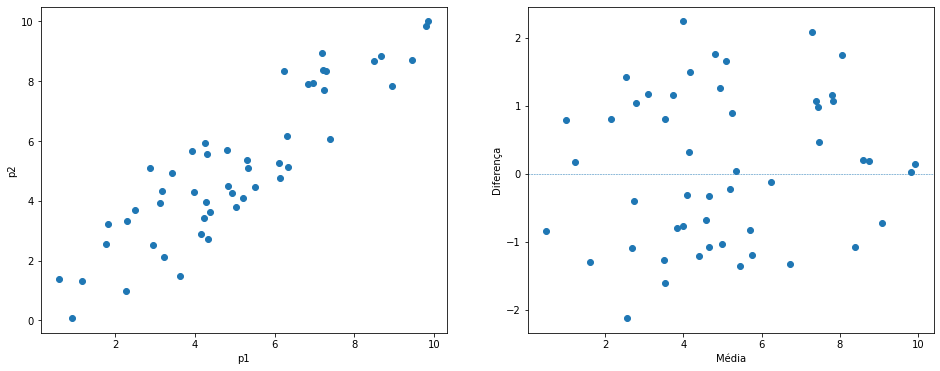

In [4]:
# Definição da figura e configuração dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico dos valores de p1 na horizontal X p2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2)
ax[0].set_xlabel('p1')  # Legenda do eixo x
ax[0].set_ylabel('p2')  # Legenda do eixo y

# Gráfico da Média em relação a Diferença de p1 X p2
scatter2 = ax[1].scatter(x=df['média'], y=df['diferença'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')  # Linha horizontal no valor 0
ax[1].set_xlabel('Média')  # Legenda do eixo x
ax[1].set_ylabel('Diferença')  # Legenda do eixo y

plt.show()

b) Calcule a correlação entre os dados da **p1** e **p2**

In [6]:
print("Correlação entre p1 e p2:", df.p1.corr(df.p2))

Correlação entre p1 e p2: 0.8957365818728046


c) Calcule a correlação entre os dados transformados (média e diferença)

In [7]:
print("Correlação entre a média e a diferença:", df['média'].corr(df['diferença']))

Correlação entre a média e a diferença: 0.13347385411788837


d) Comente as correlações observadas.

A correlação de 0,89 entre as variáveis `p1` e `p2` revela uma forte correlação positiva, sinalizando uma relação robusta e direta entre estes conjuntos de dados. Tal correlação sugere que, geralmente, quando uma variável aumenta, a outra também o faz, refletindo uma alta consistência e paralelismo em seus comportamentos.

Quanto às variáveis transformadas (`média` e `diferença`), o valor de correlação obtido de -0,13 aponta para uma correlação negativa leve. Esse resultado implica uma relação inversa tênue entre as variáveis, onde o aumento em uma poderia levar a uma redução na outra e vice-versa. Contudo, dada a proximidade desse valor com zero, a força dessa correlação inversa é considerada fraca, indicando que essa relação inversa pode não ser robusta ou consistentemente previsível.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [8]:
df['soma'] = df.p1 + df.p2  # Cálculo da soma entre p1 e p2

(df.style  # Configurar o estilo do dataframe
   .format(precision=2,  # Definir a precisão para 2 casas decimais
           decimal=',')
   .bar(subset='diferença',  # Estilização da coluna 'diferença' com barras coloridas para visualizar valores positivos e negativos
        color=['pink', 'lightblue'], 
        align='zero')
   .background_gradient(subset=['média', 'soma']))  # Estilização das colunas 'média' e 'soma' com cores de acordo com os valores

,p1,p2,média,diferença,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","19,64"
7,"6,85","7,92","7,38","1,07","14,77"
8,"4,81","5,70","5,25","0,89","10,51"
9,"3,92","5,68","4,80","1,75","9,60"


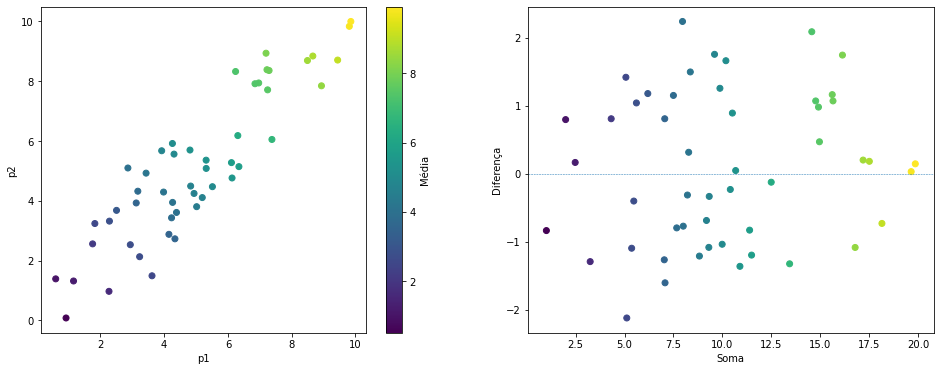

In [9]:
# Definição da figura e configuração dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico dos valores de p1 na horizontal X p2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['média'])
ax[0].set_xlabel('p1')  # Legenda do eixo x
ax[0].set_ylabel('p2')  # Legenda do eixo y

# Barra de cores para representar a média
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média')  # Legenda da barra de cores

# Gráfico da Soma em relação a Diferença de p1 X p2
scatter2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['média'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')  # Linha horizontal no valor 0
ax[1].set_xlabel('Soma')  # Legenda do eixo x
ax[1].set_ylabel('Diferença')  # Legenda do eixo y

plt.show()

Ao examinar o primeiro gráfico, nota-se uma distribuição uniforme dos valores de 0 a 10 para ambas as variáveis `p1` e `p2`, indicando uma dispersão equilibrada dos dados sem predominância de qualquer intervalo específico. Essa uniformidade na distribuição sugere que os dados estão bem distribuídos ao longo do espectro, sem áreas de aglomeração intensa ou vazios notáveis. Como resultado, a média das variáveis também espelha essa distribuição homogênea, refletindo de maneira fiel as características das variáveis `p1` e `p2`.

Com a transformação dos dados para calcular a soma e a diferença, observa-se que a variação mantém sua proporção tanto para incrementos quanto para decrementos nos valores de `p1` em relação a `p2` ao longo do conjunto de dados. Essa constatação implica que as operações de adição e subtração conservam a relação de escala entre os valores das variáveis, mantendo inalterada a inter-relação entre elas.

Tais análises revelam que as dinâmicas entre `p1` e `p2`, seja na distribuição original ou nas transformadas pela soma e diferença, exibem uma propriedade de proporcionalidade que preserva as relações de magnitude entre seus valores. Isso é crucial para análises e interpretações subsequentes dos dados. Ademais, conclui-se que a soma das variáveis equivale ao dobro de sua média, enquanto a média representa metade da soma de `p1` e `p2`. Esta inter-relação entre soma, média, e as variáveis `p1` e `p2` sublinha a relevância da proporcionalidade no tratamento e na compreensão dos dados, oferecendo insights adicionais sobre a estrutura e o comportamento do conjunto de dados analisado.